In [2]:
import gym
import d4rl # Import required to register environments
import numpy as np
import pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm
from sklearn.decomposition import PCA

No module named 'flow'
No module named 'carla'
pybullet build time: Mar  7 2022 18:18:14


In [37]:
name = "halfcheetah-expert-v2"
env = gym.make(name)
dataset = env.get_dataset()
actions = dataset['actions']
observations = dataset['observations']
rewards = dataset['rewards']

/Users/shiro/miniforge3/envs/wikirl-gym/lib/python3.8/site-packages/gym/spaces/box.py:84: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")
load datafile: 100%|██████████████████████████████████████████████████████████████████| 21/21 [00:01<00:00, 14.36it/s]


In [41]:
action_feature = PCA(n_components=1).fit(actions).transform(actions)
state_feature = PCA(n_components=1).fit(observations).transform(observations)

In [50]:
state_feature_cls_list, freqs = np.unique(state_feature, return_counts=True)

In [54]:
np.argsort(freqs)[:len(freqs)//16]

array([70,  0,  1, 69])

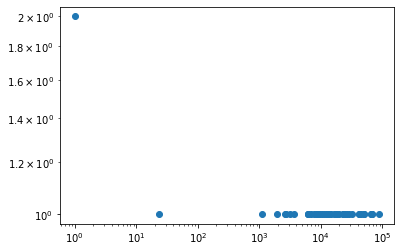

In [45]:
total_trajectory_len = 1000000
round_idx = 0

# select sub-actions
state_feature = state_feature[:total_trajectory_len, :]

# round action
state_feature = np.round(state_feature, round_idx)

state_feature, freqs = np.unique(state_feature, return_counts=True)[8]

gap_list = []

gap_len = 0
for state in state_feature:
    if state == state_cls:
        gap_list.append(gap_len)
        gap_len = 0
    else:
        gap_len += 1
        
gap, freq = np.unique(gap_list, return_counts=True)
plt.scatter(gap, freq)
plt.xscale('log')
plt.yscale('log')
plt.show()